## Import librabry

## Over view on the dataset 
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



In [1]:
# Import libearies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset and show it.
df = pd.read_csv("/kaggle/input/sf-salaries/Salaries.csv")
df

/tmp/ipykernel_19/1364677924.py:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/sf-salaries/Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


data consect from 148654 rows × 13 columns

# Exprloatry data analysis (EDA)

In [3]:
df.shape

(148654, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


in this cell we show the information about data and the datatype for any one, and we need to convert the('BasePay', 'OvartimePay', 'OtherPay', 'Benefits')

In [5]:
# Convert the follwing list to numerical data,
columns_to_convert = ['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

Convert data becoues it in normal is a numircal data.

In [6]:
# Show the information after convert some of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [7]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

* Each of [Notes, Status] as full nun value in data perpation we will dorp it
* Some of futcher have a missing value will preparing it

In [8]:
# Cheek if data have duplicated ?
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [10]:
# The top 5 most common jobs
df['JobTitle'].value_counts().head()

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

# Descriptive Statistics

In [11]:
# Show the descibe meguer in the numircal data.
df.describe().round(2)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.00,148045.00,148650.00,148650.00,112491.00,148654.00,148654.00,148654.00,0.0
mean,74327.50,66325.45,5066.06,3648.77,25007.89,74768.32,93692.55,2012.52,NaN
std,42912.86,42764.64,11454.38,8056.60,15402.22,50517.01,62793.53,1.12,NaN
min,1.00,-166.01,-0.01,-7058.59,-33.89,-618.13,-618.13,2011.00,NaN
25%,37164.25,33588.20,0.00,0.00,11535.40,36169.00,44065.65,2012.00,NaN
50%,74327.50,65007.45,0.00,811.27,28628.62,71426.61,92404.09,2013.00,NaN
75%,111490.75,94691.05,4658.18,4236.07,35566.85,105839.14,132876.45,2014.00,NaN
max,148654.00,319275.01,245131.88,400184.25,96570.66,567595.43,567595.43,2014.00,NaN


in this cell we show the some descriptive statistics about data for ex(minumam, maxumam, mean, Std) it reflect some of data

In [12]:
# For exsample make a some statistics in this futcher 'TotalPay'
df['TotalPay'].mean()

74768.32197169267

In [13]:
df['TotalPay'].std()

50517.00527394987

In [14]:
# Get the range of 'TotalPay' -- range = max - min
rangTotalPay = (df['TotalPay'].max() - df['TotalPay'].min())
rangTotalPay

568213.56

# Data Cleaning

In [15]:
# Drop unimportant columns.
df.drop(['Id','Notes','Agency','Status','EmployeeName','JobTitle'], axis=1, inplace= True)

In [16]:
# Fill mising value 
df.isnull().sum()

BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [17]:
# Fill mising value by mean 
mean_benefits = df['Benefits'].mean()
mean_benefits
df.fillna(mean_benefits, inplace = True)

In [18]:
df.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [19]:
# Show some statatisc in dataset after cleaning 
df.describe().round(2)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.00,148654.00,148654.00,148654.00,148654.00,148654.00,148654.00
mean,66156.18,5066.60,3649.34,25007.89,74768.32,93692.55,2012.52
std,42758.47,11454.69,8057.26,13398.41,50517.01,62793.53,1.12
min,-166.01,-0.01,-7058.59,-33.89,-618.13,-618.13,2011.00
25%,32792.54,0.00,0.00,22342.30,36169.00,44065.65,2012.00
50%,64861.60,0.00,811.35,25007.89,71426.61,92404.09,2013.00
75%,94605.74,4658.67,4237.03,33468.98,105839.14,132876.45,2014.00
max,319275.01,245131.88,400184.25,96570.66,567595.43,567595.43,2014.00


# Data Visualization

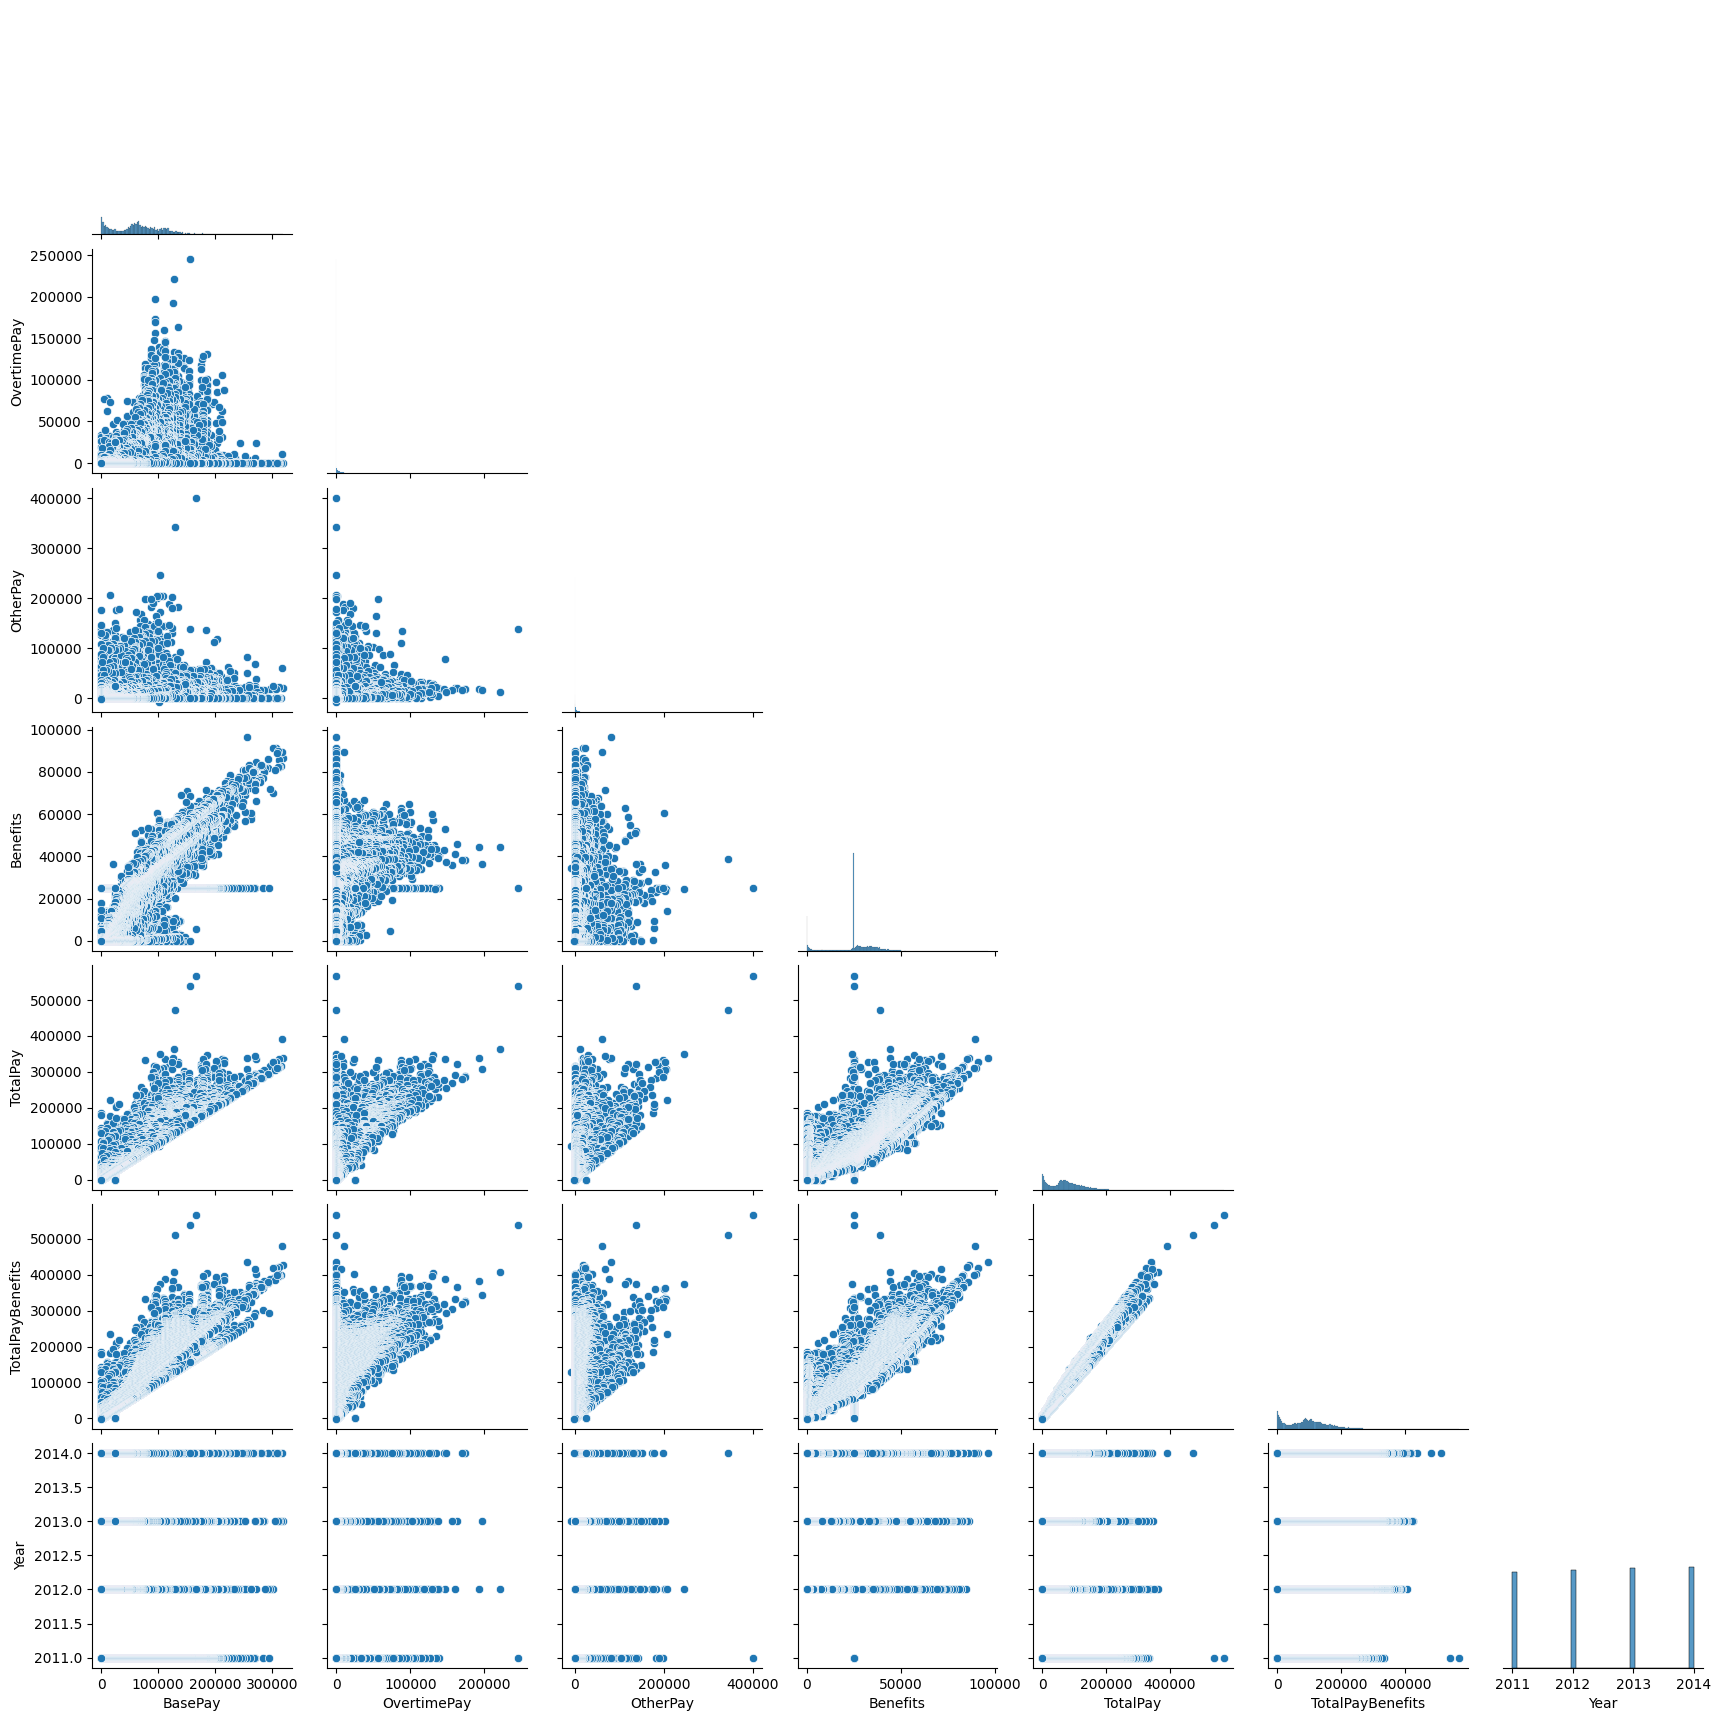

In [20]:
sns.pairplot(df, corner=True)

<Axes: >

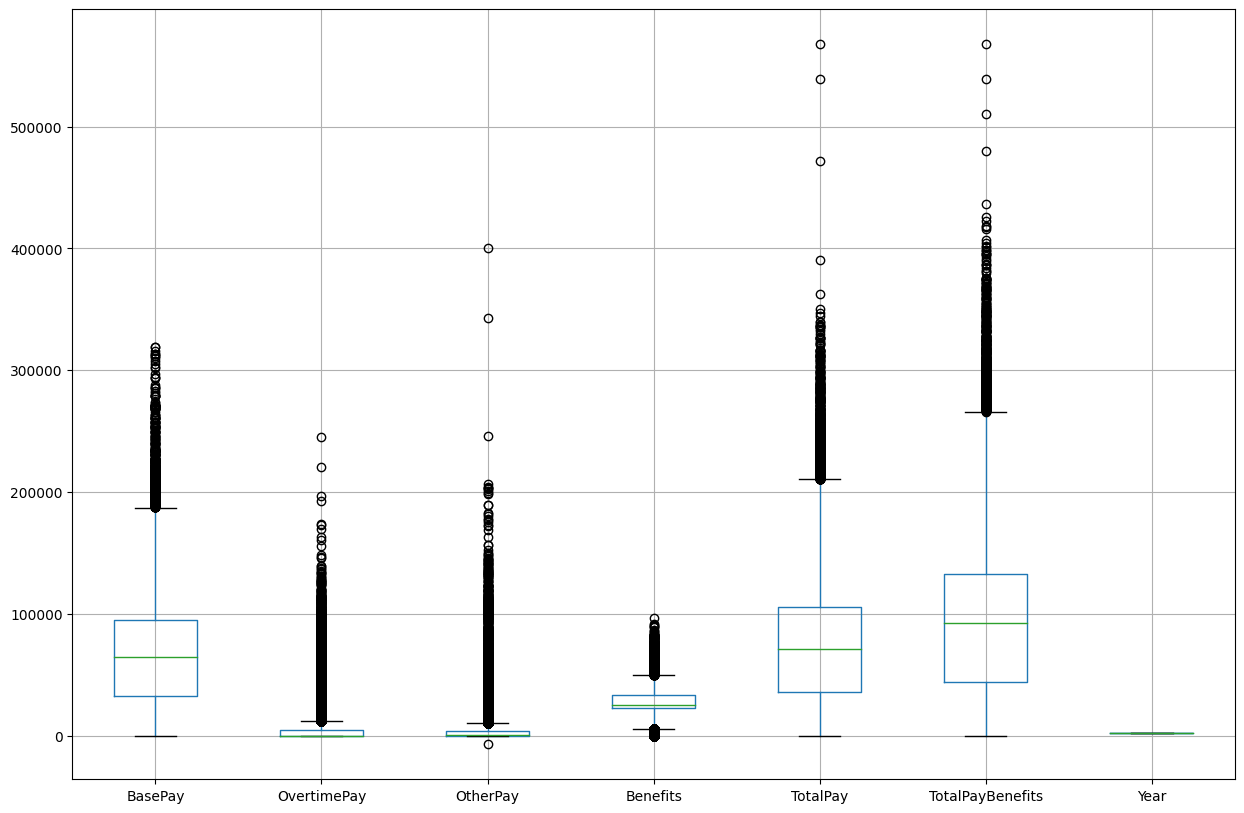

In [21]:
df.boxplot(figsize=(15,10))

the most of data have outliers

Text(0.5, 1.0, '5 number summary of TotalPay')

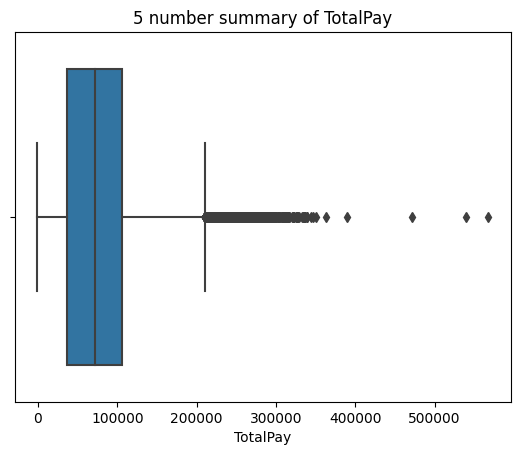

In [22]:
# Show the 5 namber summary for TotalPayBenefits
sns.boxplot(x=df['TotalPay']).set_title("5 number summary of TotalPay")

After 200000$ is outliers


# Grouped Analysis¶

In [23]:
grouped_data = df.groupby('Year')['TotalPay'].mean()
grouped_data

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

grouped analysis it's used for grouping the data according to the categories and applying a function to the categories

# Simple Correlation Analysis

In [24]:
df.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           148654 non-null  float64
 1   OvertimePay       148654 non-null  float64
 2   OtherPay          148654 non-null  float64
 3   Benefits          148654 non-null  float64
 4   TotalPay          148654 non-null  float64
 5   TotalPayBenefits  148654 non-null  float64
 6   Year              148654 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 7.9 MB


<Axes: >

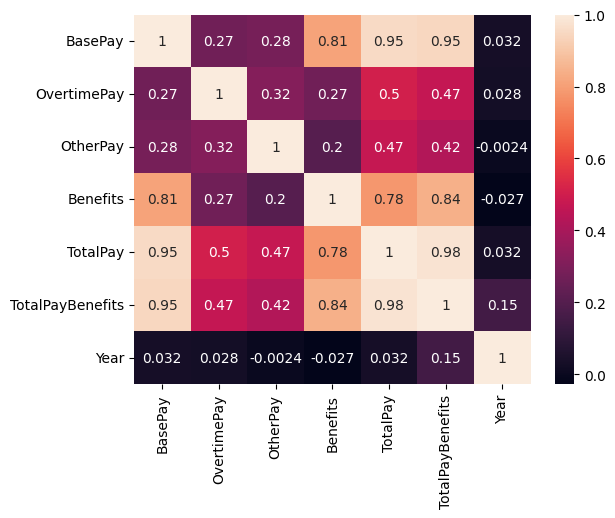

In [26]:
# Corrlation uesing heatmap
sns.heatmap(df.corr(), annot=True)

from heatmap we show the corrlation between the futcher's

95% in 'TotalPay' based on 'BasePay'

# Summary of Insights

About this data we work in salary for some empelwee at san francisco form 2011 : 2014

* in SF. the mean of TotalPay is about 93500 at year.